<a href="https://colab.research.google.com/github/arimbawa/Big-Data/blob/main/01_Python_untuk_Big_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np

df = pd.read_csv("sample_data/vgsales.csv")       # CSV
#df = pd.read_excel("data.xlsx")                  # Excel
#df = pd.read_json("data.json")                   # JSON
#df = pd.read_parquet("data.parquet")             # Parquet (efisien untuk Big Data)

In [4]:
df.to_excel("sample_data/output.xlsx", index=False)

In [7]:
# Contoh DataFrame
data = {
    "nama": ["Andi","Andi", "Budi", "Citra","Mr Yus"],
    "usia": [25,25, 30, 22, np.nan],
    "berat": [56,58, 48, 65,92],
    "kota": ["Jakarta","Jakarta", "Bandung", "Surabaya", np.nan]
}
df_new = pd.DataFrame(data)

# Simpan ke Parquet
df_new.to_parquet("sample_data/data.parquet", engine="pyarrow", index=False)
df.to_parquet("sample_data/vgsales.parquet", engine="pyarrow", index=False)

In [8]:
df_new

,nama,usia,berat,kota
0,Andi,25.0,56,Jakarta
1,Andi,25.0,58,Jakarta
2,Budi,30.0,48,Bandung
3,Citra,22.0,65,Surabaya
4,Mr Yus,NaN,92,NaN


In [9]:
df = pd.read_parquet("sample_data/data.parquet")
#df = df.dropna()
df['usia'] = df['usia'].fillna(40)
df['kota'] = df['kota'].fillna("Mataram")
df = df.drop_duplicates()
df

,nama,usia,berat,kota
0,Andi,25.0,56,Jakarta
1,Andi,25.0,58,Jakarta
2,Budi,30.0,48,Bandung
3,Citra,22.0,65,Surabaya
4,Mr Yus,40.0,92,Mataram


In [10]:
databaru = df[df['usia'] > 26]
databaru

,nama,usia,berat,kota
2,Budi,30.0,48,Bandung
4,Mr Yus,40.0,92,Mataram


In [16]:
df['new'] = df["usia"] + df['berat']
df

,nama,usia,berat,kota,new
0,Andi,25.0,56,Jakarta,81.0
1,Andi,25.0,58,Jakarta,83.0
2,Budi,30.0,48,Bandung,78.0
3,Citra,22.0,65,Surabaya,87.0
4,Mr Yus,40.0,92,Mataram,132.0


In [17]:
df['new'] = df['usia'] + df['berat']

In [18]:
df['berat'] = df['berat'].astype('float')

In [19]:
df.describe()

,usia,berat,new
count,5.000000,5.000000,5.000000
mean,28.400000,63.800000,92.200000
std,7.092249,16.887865,22.487774
min,22.000000,48.000000,78.000000
25%,25.000000,56.000000,81.000000
50%,25.000000,58.000000,83.000000
75%,30.000000,65.000000,87.000000
max,40.000000,92.000000,132.000000


In [20]:
df.groupby('kota')['berat'].mean()

,berat
kota,
Bandung,48.0
Jakarta,57.0
Mataram,92.0
Surabaya,65.0


In [21]:
df

,nama,usia,berat,kota,new
0,Andi,25.0,56.0,Jakarta,81.0
1,Andi,25.0,58.0,Jakarta,83.0
2,Budi,30.0,48.0,Bandung,78.0
3,Citra,22.0,65.0,Surabaya,87.0
4,Mr Yus,40.0,92.0,Mataram,132.0


In [22]:
!pip install dask[complete]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 13.8 MB/s eta 0:00:00


In [23]:
import dask.dataframe as dd

In [24]:
# Membaca file CSV besar
df = dd.read_csv("sample_data/vgsales.csv", dtype={'Year': 'float64'})

# Operasi mirip Pandas
print(df.head())                        # lihat 5 baris pertama
print(df.dtypes)                        # tipe data kolom
print(df['JP_Sales'].mean().compute())  # hitung rata-rata kolom

   Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37  
Rank                      int64
Name            string[pyarrow]
Platform        string[pyarrow]
Year                    float64
Genre           string[pyarrow]
Publi

In [25]:
df.groupby('Platform')['JP_Sales'].mean().compute()

,JP_Sales
Platform,
2600,0.000000
3DO,0.033333
3DS,0.191257
DC,0.164615
DS,0.081170
GB,0.868571
GBA,0.057579
GC,0.038813
GEN,0.098889


In [26]:
import dask.array as da

# Buat array besar
x = da.random.random((10000, 10000), chunks=(1000, 1000))

# Operasi mirip NumPy
y = x + x.T
z = y.mean()

print(z.compute())  # eksekusi

0.9999373534540495


In [27]:
print(x)

dask.array<random_sample, shape=(10000, 10000), dtype=float64, chunksize=(1000, 1000), chunktype=numpy.ndarray>


In [28]:
# Membuat rentang waktu (datetime) setiap 10 menit
date_rng = pd.date_range(start='2025-09-01', end='2025-09-02', freq='10min')

# Membuat data acak sensor IoT
np.random.seed(42)  # supaya hasil acak bisa direproduksi
data = {
    "timestamp": date_rng,
    "temperature": np.random.uniform(20, 35, size=len(date_rng)),  # derajat Celsius
    "humidity": np.random.uniform(40, 80, size=len(date_rng)),     # persen
    "light": np.random.randint(100, 1000, size=len(date_rng)),     # lux
    "motion": np.random.choice([0, 1], size=len(date_rng), p=[0.8, 0.2])  # sensor PIR (0=tidak ada, 1=ada)
}

# Membuat DataFrame
df_iot = pd.DataFrame(data)

# Menampilkan 10 data pertama
print(df_iot.head(10))

# Opsional: Simpan ke file CSV
df_iot.to_csv("sample_data/iot_data.csv", index=False)

# Opsional: Simpan ke file JSON
df_iot.to_json("sample_data/iot_data.json", orient="records", date_format="iso")

            timestamp  temperature   humidity  light  motion
0 2025-09-01 00:00:00    25.618102  41.475478    441       0
1 2025-09-01 00:10:00    34.260715  64.382573    404       0
2 2025-09-01 00:20:00    30.979909  60.107161    791       1
3 2025-09-01 00:30:00    28.979877  42.059150    781       0
4 2025-09-01 00:40:00    22.340280  51.145859    937       1
5 2025-09-01 00:50:00    22.339918  76.330635    882       0
6 2025-09-01 01:00:00    20.871254  49.582476    153       0
7 2025-09-01 01:10:00    32.992642  45.795795    543       0
8 2025-09-01 01:20:00    29.016725  59.578110    712       0
9 2025-09-01 01:30:00    30.621089  79.426018    363       1


In [30]:
import dask.dataframe as dd

df = dd.read_csv("sample_data/iot_data.csv")

# Hitung rata-rata suhu per jam
df['timestamp'] = dd.to_datetime(df['timestamp'])
df['hour'] = df['timestamp'].dt.hour

mean_per_hour = df.groupby('hour')['temperature'].mean()

print(mean_per_hour.compute())

hour
0     26.970201
1     28.059854
2     25.597525
3     25.332569
4     26.485048
5     28.915089
6     25.359716
7     26.741976
8     30.776521
9     25.437018
10    26.672869
11    27.438798
12    27.755408
13    25.887982
14    28.406892
15    28.549160
16    24.378560
17    27.864299
18    26.236422
19    29.817519
20    26.966575
21    27.089909
22    27.363507
23    28.369420
Name: temperature, dtype: float64


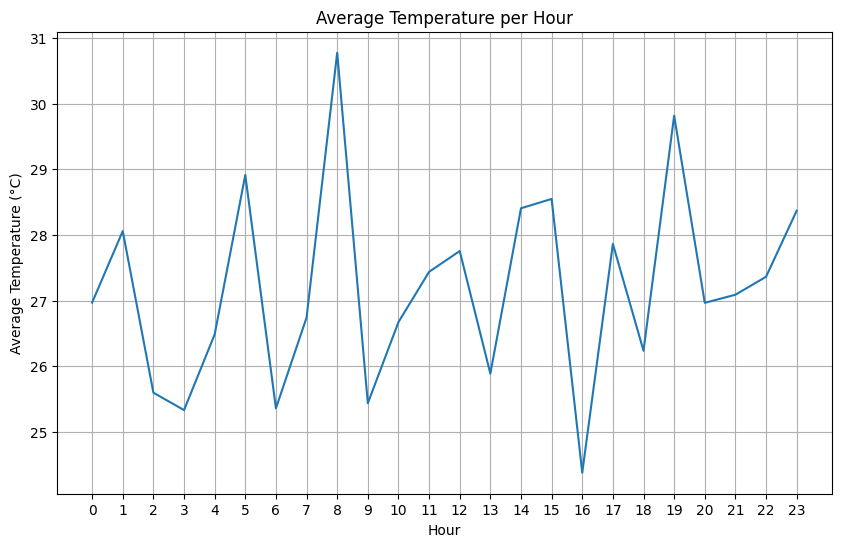

In [32]:
import matplotlib.pyplot as plt

# Plotting the line chart
plt.figure(figsize=(10, 6))
plt.plot(mean_per_hour.index.compute(), mean_per_hour.values.compute())
plt.xlabel('Hour')
plt.ylabel('Average Temperature (°C)')
plt.title('Average Temperature per Hour')
plt.xticks(mean_per_hour.index.compute())
plt.grid(True)
plt.show()